In [1]:
# Student: ALEKSEJS VESJOLIJS
# ST43537

# Date: 20 May 2024

# RELSTAT 2024
# Research: Hyperloop Routes Optimization Considering Barren Soil Using Operation Research, Case of Latvia

# TRANSPORTA UN SAKARU INSTITŪTS
# DATORZINĀTŅU UN TELEKOMUNIKĀCIJU FAKULTĀTE

In [2]:
# EXPLORATIVE DATA ANALYSIS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus, value

In [4]:
# Collected data from Copernicus
data = {
    'From': ['Riga', 'Riga', 'Riga', 'Riga', 'Daugavpils', 'Daugavpils', 'Daugavpils', 'Liepaja', 'Liepaja', 'Liepaja', 'Jelgava', 'Jelgava', 'Jelgava', 'Jurmala', 'Jurmala', 'Valmiera', 'Valmiera', 'Jekabpils', 'Jelgava', 'Rezekne', 'Jekabpils', 'Liepaja', 'Jurmala', 'Ventspils', 'Jelgava', 'Ventspils', 'Valmiera', 'Rezekne', 'Jekabpils'],
    'To': ['Jelgava', 'Jurmala', 'Valmiera', 'Jekabpils', 'Jelgava', 'Rezekne', 'Jekabpils', 'Jelgava', 'Jurmala', 'Ventspils', 'Jurmala', 'Ventspils', 'Valmiera', 'Riga', 'Valmiera', 'Riga', 'Jekabpils', 'Riga', 'Daugavpils', 'Daugavpils', 'Daugavpils', 'Liepaja', 'Liepaja', 'Liepaja', 'Jelgava', 'Jurmala', 'Rezekne', 'Valmiera', 'Valmiera'],
    'Barren soil': [13, 6, 27, 29, 37, 13, 9, 45, 55, 26, 15, 40, 46, 6, 27, 29, 4, 13, 37, 13, 9, 25, 55, 26, 15, 20, 46, 24, 4],
    'Distance': [45, 38, 107, 140, 230, 89, 89, 182, 192, 118, 45, 176, 185, 38, 107, 140, 162, 45, 230, 89, 89, 182, 192, 118, 45, 154, 185, 101, 162]
}

df = pd.DataFrame(data)

In [5]:
print(df.head())

         From         To  Barren soil  Distance
0        Riga    Jelgava           13        45
1        Riga    Jurmala            6        38
2        Riga   Valmiera           27       107
3        Riga  Jekabpils           29       140
4  Daugavpils    Jelgava           37       230


In [6]:
print(df.describe())

       Barren soil    Distance
count     29.00000   29.000000
mean      24.62069  126.724138
std       15.29569   59.315679
min        4.00000   38.000000
25%       13.00000   89.000000
50%       25.00000  118.000000
75%       37.00000  182.000000
max       55.00000  230.000000


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


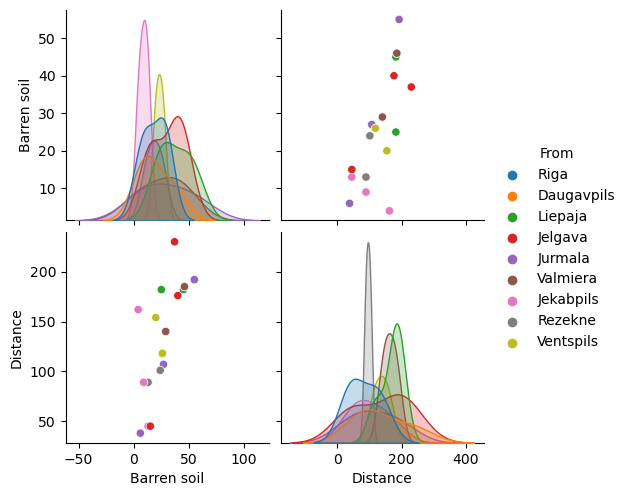

In [7]:
# Create plots to visualize the data
sns.pairplot(df, hue='From')
plt.show()

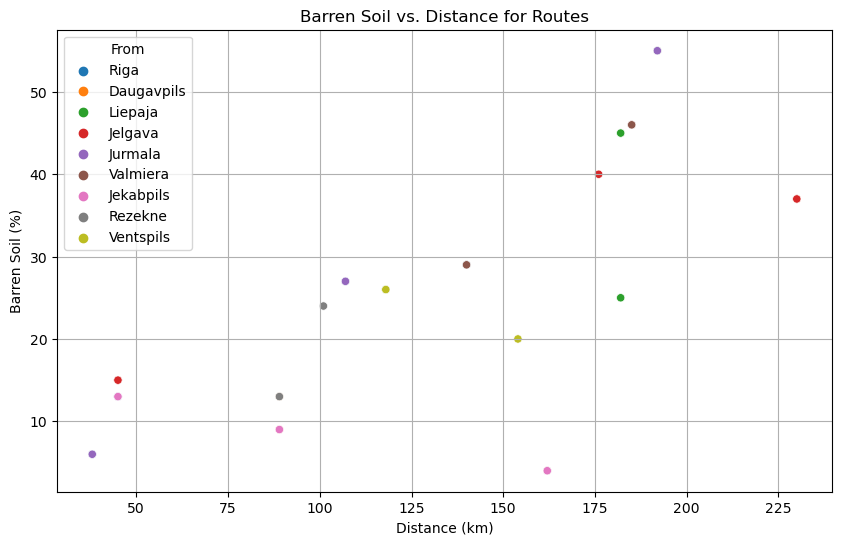

In [8]:
# Plotting Barren soil vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Barren soil', hue='From', data=df)
plt.title('Barren Soil vs. Distance for Routes')
plt.xlabel('Distance (km)')
plt.ylabel('Barren Soil (%)')
plt.grid(True)
plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Barren Soil')

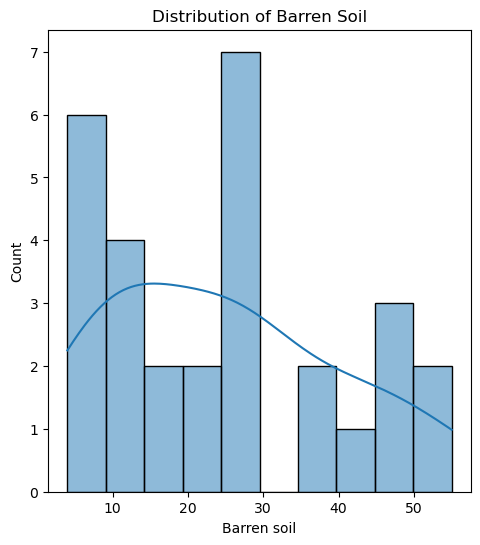

In [9]:
# Checking distribution of Barren Soil and Distance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Barren soil'], bins=10, kde=True)
plt.title('Distribution of Barren Soil')

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


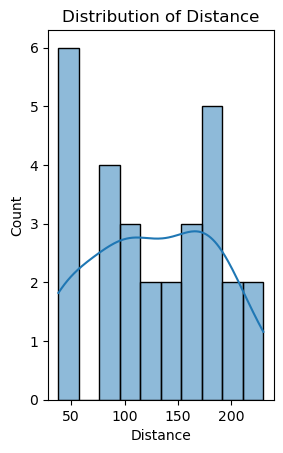

In [10]:
plt.subplot(1, 2, 2)
sns.histplot(df['Distance'], bins=10, kde=True)
plt.title('Distribution of Distance')
plt.show()

In [11]:
# OPERATIONS RESEARCH PROBLEM SOLUTION

In [12]:
data = {
    'From': ['Riga', 'Riga', 'Riga', 'Daugavpils', 'Daugavpils', 'Liepaja', 'Jelgava', 'Jelgava', 'Valmiera', 'Jekabpils'],
    'To': ['Jelgava', 'Jurmala', 'Valmiera', 'Jelgava', 'Rezekne', 'Jelgava', 'Jurmala', 'Ventspils', 'Rezekne', 'Valmiera'],
    'Barren soil': [13, 6, 27, 37, 13, 45, 15, 40, 46, 24],
    'Distance': [45, 38, 107, 230, 89, 182, 45, 176, 185, 101]
}
df = pd.DataFrame(data)

# Create the linear programming model
model = LpProblem(name="hyperloop-route-optimization", sense=LpMaximize)

# Decision variables
route_vars = {row.Index: LpVariable(name=f"route_{row.Index}", cat='Binary')
              for row in df.itertuples()}

# Objective function: Maximize the sum of barren soil * decision variable
model += lpSum(row['Barren soil'] * route_vars[idx] for idx, row in df.iterrows()), "Maximize_Barren_Soil_Coverage"

# Constraints: each city is connected at least once
cities = set(df['From']) | set(df['To'])
for city in cities:
    model += (lpSum(route_vars[i] for i in df.index[(df['From'] == city) | (df['To'] == city)]) >= 1,
              f"Connectivity_{city}")

# Solving the model
model.solve()

print("Status:", LpStatus[model.status])
print("Optimal Solution to the problem: Total Barren Soil = ", value(model.objective))
for var in model.variables():
    if var.value() == 1:
        print(var.name, "=", var.value())

selected_routes = df.loc[[int(v.name.split('_')[1]) for v in model.variables() if v.varValue == 1]]
print(selected_routes)

Status: Optimal
Optimal Solution to the problem: Total Barren Soil =  266.0
route_0 = 1.0
route_1 = 1.0
route_2 = 1.0
route_3 = 1.0
route_4 = 1.0
route_5 = 1.0
route_6 = 1.0
route_7 = 1.0
route_8 = 1.0
route_9 = 1.0
         From         To  Barren soil  Distance
0        Riga    Jelgava           13        45
1        Riga    Jurmala            6        38
2        Riga   Valmiera           27       107
3  Daugavpils    Jelgava           37       230
4  Daugavpils    Rezekne           13        89
5     Liepaja    Jelgava           45       182
6     Jelgava    Jurmala           15        45
7     Jelgava  Ventspils           40       176
8    Valmiera    Rezekne           46       185
9   Jekabpils   Valmiera           24       101


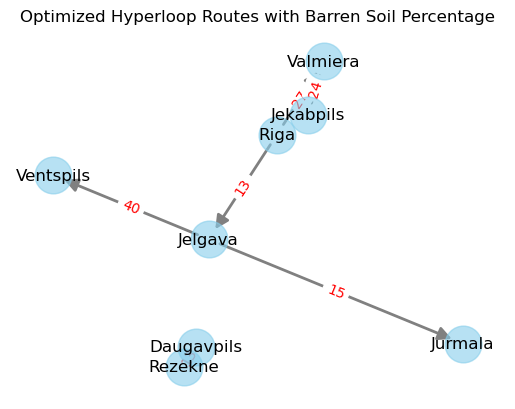

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming 'df' is the DataFrame and 'selected_routes' contains the routes selected by the optimization model
data = {
    'From': ['Riga', 'Riga', 'Riga', 'Daugavpils', 'Daugavpils', 'Liepaja', 'Jelgava', 'Jelgava', 'Valmiera', 'Jekabpils'],
    'To': ['Jelgava', 'Jurmala', 'Valmiera', 'Jelgava', 'Rezekne', 'Jelgava', 'Jurmala', 'Ventspils', 'Rezekne', 'Valmiera'],
    'Barren soil': [13, 6, 27, 37, 13, 45, 15, 40, 46, 24],
    'Distance': [45, 38, 107, 230, 89, 182, 45, 176, 185, 101],
    'Selected': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]  # Binary flags indicating whether the route was selected
}
df = pd.DataFrame(data)

# Filter to only selected routes
selected_routes = df[df['Selected'] == 1]

# Create a directed graph
G = nx.DiGraph()

# Add edges based on the selected routes
for _, row in selected_routes.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Barren soil'])

# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.6)

# Draw the edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)

# Label the nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Add edge labels to show the barren soil percentage
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Optimized Hyperloop Routes with Barren Soil Percentage')
plt.axis('off')  # Turn off the axis
plt.show()